<a href="https://colab.research.google.com/github/cityu-assignment/CS3481-assignment1/blob/main/cs3481_asm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from scipy.io import arff
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import graphviz 

In [33]:
data = arff.loadarff("/content/column_3C_weka.arff")
df = pd.DataFrame(data[0])
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Hernia'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Hernia'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Hernia'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Hernia'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Hernia'
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


In [34]:
X = df[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']].values
X[0:5]

array([[ 63.0278175 ,  22.55258597,  39.60911701,  40.47523153,
         98.67291675,  -0.25439999],
       [ 39.05695098,  10.06099147,  25.01537822,  28.99595951,
        114.4054254 ,   4.56425864],
       [ 68.83202098,  22.21848205,  50.09219357,  46.61353893,
        105.9851355 ,  -3.53031731],
       [ 69.29700807,  24.65287791,  44.31123813,  44.64413017,
        101.8684951 ,  11.21152344],
       [ 49.71285934,   9.65207488,  28.317406  ,  40.06078446,
        108.1687249 ,   7.91850062]])

In [49]:
y = df['class']
y = y.astype('string')
y

0      b'Hernia'
1      b'Hernia'
2      b'Hernia'
3      b'Hernia'
4      b'Hernia'
         ...    
305    b'Normal'
306    b'Normal'
307    b'Normal'
308    b'Normal'
309    b'Normal'
Name: class, Length: 310, dtype: string

In [48]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [102]:
clf = DecisionTreeClassifier(max_depth=3) 
clf.fit(X_trainset, y_trainset)

DecisionTreeClassifier(max_depth=3)

In [104]:
from sklearn import metrics

predTree = clf.predict(X_testset)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8494623655913979


In [105]:
print(predTree[0:5])
print(y_testset[0:5])

["b'Spondylolisthesis'" "b'Normal'" "b'Normal'" "b'Hernia'"
 "b'Spondylolisthesis'"]
159    b'Spondylolisthesis'
298               b'Normal'
265               b'Normal'
243               b'Normal'
194    b'Spondylolisthesis'
Name: class, dtype: string


[[15  3  0]
 [ 8 19  0]
 [ 1  2 45]]


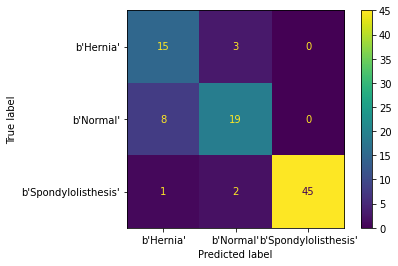

In [114]:
# confusion_matrix 

from sklearn.metrics import confusion_matrix 

metrics.plot_confusion_matrix(clf, X_testset, y_testset)

confmat = confusion_matrix(y_testset, predTree)
print(confmat)

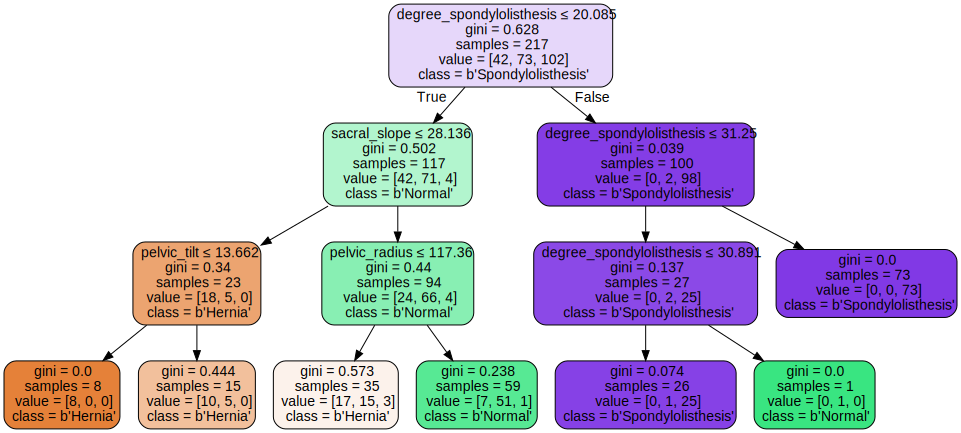

In [109]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                         feature_names=list(df.columns)[:6],   
                         class_names=clf.classes_,   
                         filled=True, rounded=True,   
                         special_characters=True)   
 
graph = graphviz.Source(dot_data)   
graph